# Read and visualise Files

## Import all the necessary libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

def get_file_name(var:str):
    return var[7:-4]

## Show datasets in folders

In [77]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'

# Get a list of all items (files and directories) in the specified path
all_items = os.listdir(directory_path)

# Iterate over each item and check if it's a directory
for item in all_items:
    folder_path = os.path.join(directory_path, item)
    if os.path.isdir(folder_path):
        if item[:7] != 'Results':
            print(f"\nFolder: {item}")
            folder_contents = os.listdir(folder_path)
            for file in folder_contents:
                file_path = os.path.join(folder_path, file)
                print(f"    -> {file}")


Folder: Dataset_2024-08-06_15-17-43
    -> data_1_normal.csv
    -> data_1_event.csv
    -> data_2_size_1.csv
    -> data_2_event.csv
    -> data_3_feeder_3.csv
    -> data_3_event.csv
    -> data_4_gripper_1.csv
    -> data_4_event.csv
    -> data_5_max_Vel_2.csv
    -> data_5_event.csv
    -> data_6_size_1.csv
    -> data_6_event.csv
    -> data_7_feeder_3.csv
    -> data_7_event.csv
    -> data_8_gripper_1.csv
    -> data_8_event.csv
    -> data_9_max_Vel_2.csv
    -> data_9_event.csv


## Select folder to read

In [78]:
folder_input = input("Please select folder.")

In [79]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'
files = {}
folder = folder_input

folder_path = os.path.join(directory_path, folder)
if os.path.isdir(folder_path):
    print(f"Chosen folder: {folder}")
    folder_contents = os.listdir(folder_path)
    for file in folder_contents:
        file_path = os.path.join(folder_path, file)
        if file[0:4] == 'data' and file[7:12] != 'event':
            files[f"{file[5:6]}_{get_file_name(file)}"] = file_path
            print(f"-> {file[5:6]}_{get_file_name(file)}")
        if file[7:12] == 'event':
            files[f"{file[5:6]}_{get_file_name(file)}"] = file_path
        

Chosen folder: Dataset_2024-08-06_15-17-43
-> 1_normal
-> 2_size_1
-> 3_feeder_3
-> 4_gripper_1
-> 5_max_Vel_2
-> 6_size_1
-> 7_feeder_3
-> 8_gripper_1
-> 9_max_Vel_2


In [80]:
file_input = input("Please select file.")

In [81]:
file_selected = files[file_input]
file_selected

'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-08-06_15-17-43\\data_7_feeder_3.csv'

### Nodes

In [82]:
EoL_nodes = ['EoL_1_X', 'EoL_1_Y',
             'EoL_2_X', 'EoL_2_Y',
             'EoL_3_X', 'EoL_3_Y',
             'EoL_4_X', 'EoL_4_Y',
             'EoL_5_X','EoL_5_Y',
             'EoL_6_X', 'EoL_6_Y']

con_nodes = ['con_1','con_2','con_3']

rob_mv_nodes = ['rob_1_1', 'rob_1_2','rob_1_3', 'rob_1_4',
             'rob_2_1', 'rob_2_2','rob_2_3', 'rob_2_4']

rob_ctrl_nodes =['rob_1_maxVel', 'rob_1_supply','rob_1_vacuum',
             'rob_2_maxVel', 'rob_2_supply','rob_2_vacuum']

cam_nodes = ['cam_1_X', 'cam_2_X', 'cam_3_X',
             'cam_1_Y', 'cam_2_Y', 'cam_3_Y']

## Normal Dataset

### End of line

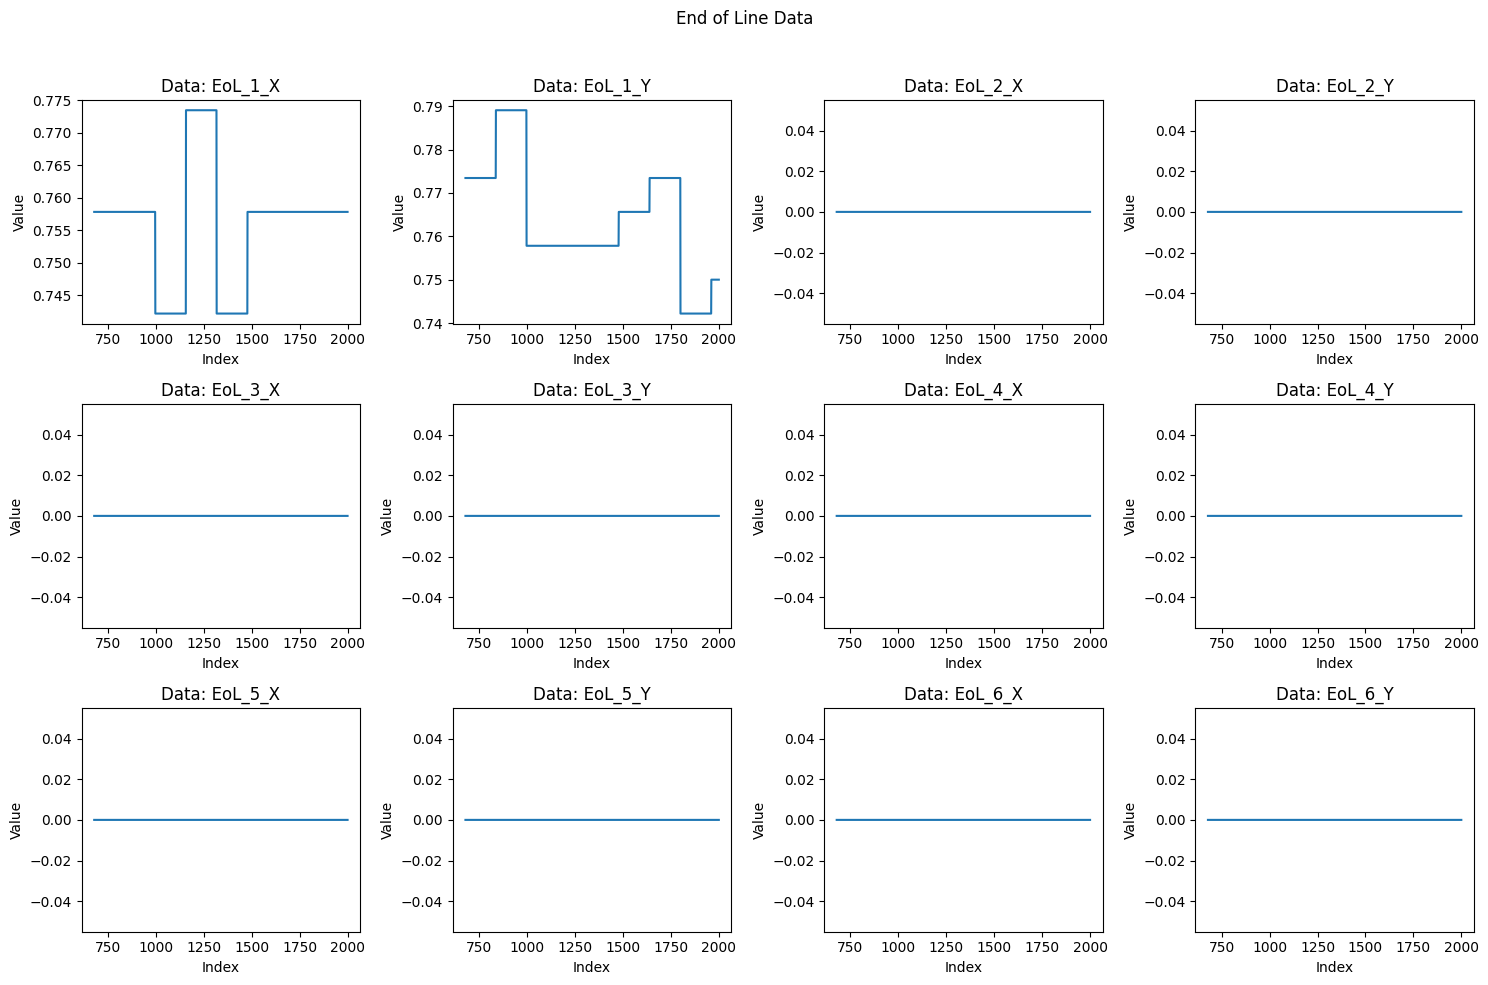

In [83]:
normal_data_df = pd.read_csv(file_selected)

normal_data_df.head()

EoL_data_df = normal_data_df[EoL_nodes]

fig, axes = plt.subplots(3,4, figsize=(15, 10))
fig.suptitle('End of Line Data')

for i, ax in enumerate(axes.flatten()):
    column =  EoL_data_df.columns[i]
    ax.plot(EoL_data_df[column][678:])
    ax.set_title(f'Data: {column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.autoscale()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


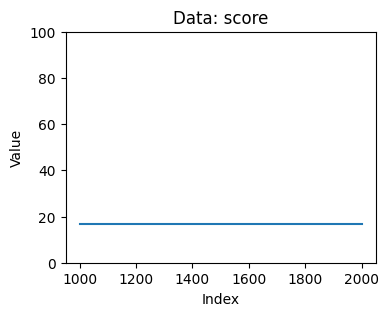

In [84]:
normal_data_df = pd.read_csv(file_selected)

normal_data_df.head()

score_data_df = normal_data_df['score']

fig, axes = plt.subplots(1,1, figsize=(4, 3))
axes.plot(score_data_df[1000:])
axes.set_title(f'Data: score')
axes.set_xlabel('Index')
axes.set_ylabel('Value')
axes.set_ylim([0,100])

plt.show()

### Conveyor

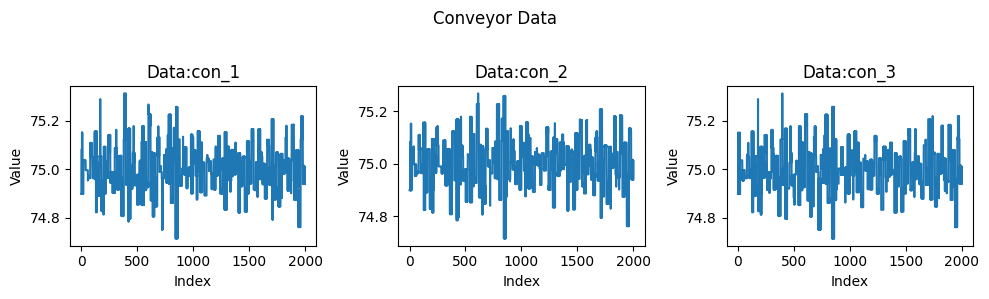

In [85]:
con_data_df = pd.read_csv(file_selected)

con_data_df.head()

con_data_df = con_data_df[con_nodes]

fig, axes = plt.subplots(1,3, figsize=(10, 3))
fig.suptitle('Conveyor Data')

for i, ax in enumerate(axes.flatten()):
    column =  con_data_df.columns[i]
    ax.plot(con_data_df[column])
    ax.set_title(f'Data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.autoscale()
    

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Robots

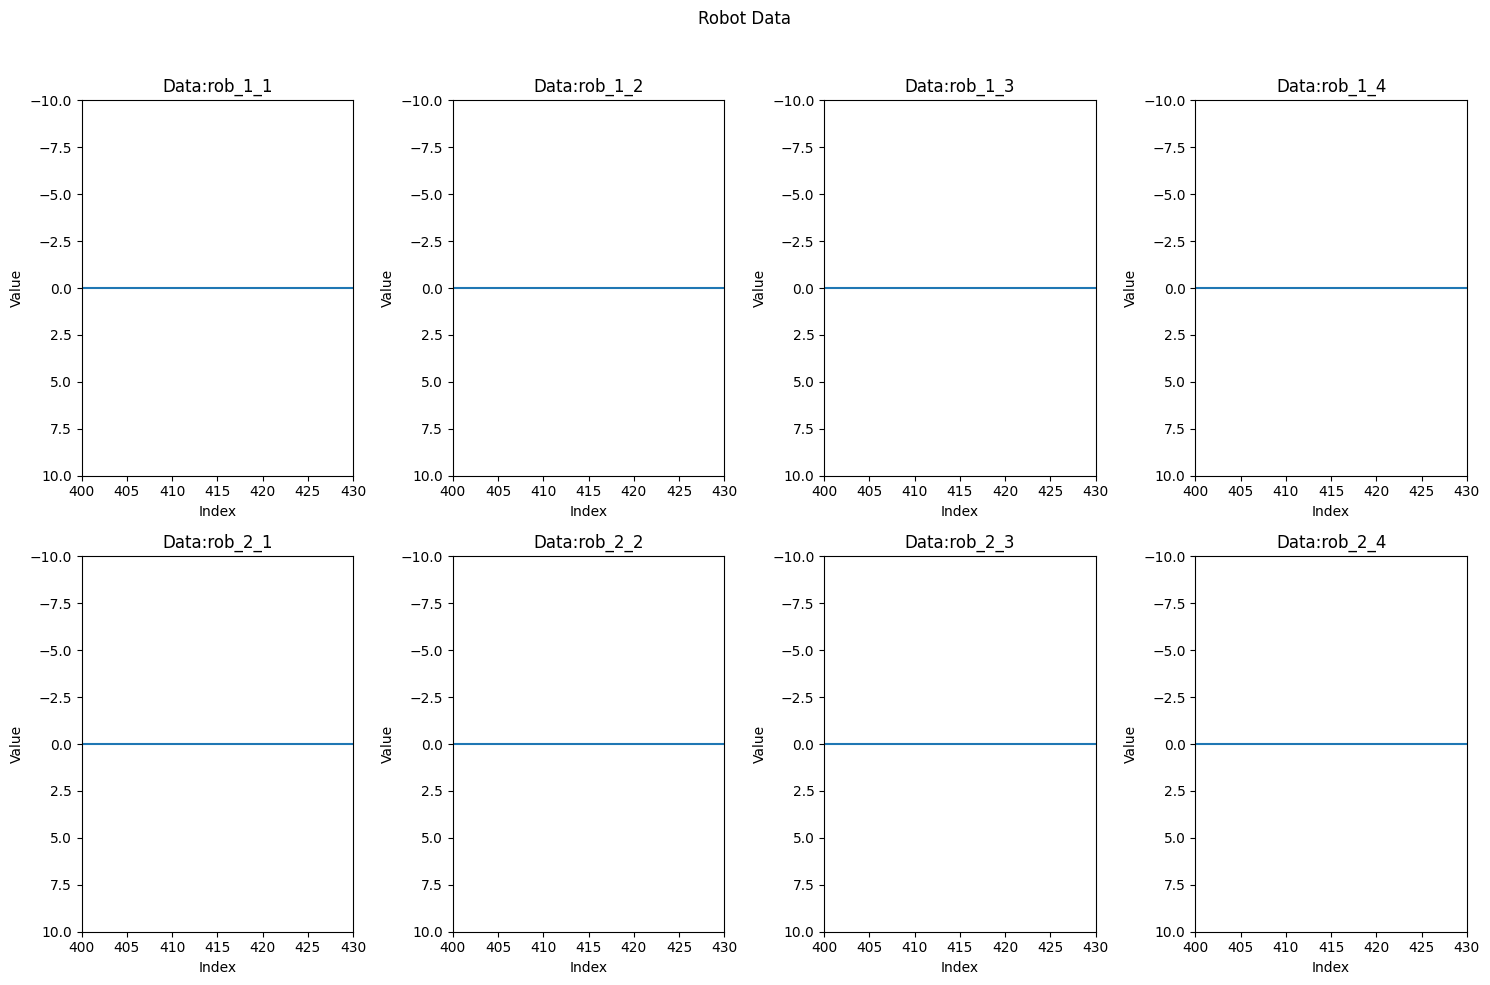

In [86]:
rob_data_df = pd.read_csv(file_selected)

rob_data_df.head()

rob_data_df = rob_data_df[rob_mv_nodes]

fig, axes = plt.subplots(2,4, figsize=(15, 10))
fig.suptitle('Robot Data')

for i, ax in enumerate(axes.flatten()):
    column =  rob_data_df.columns[i]
    ax.plot(rob_data_df[column])
    ax.set_title(f'Data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_xlim(400,430)
    ax.set_ylim(10,-10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

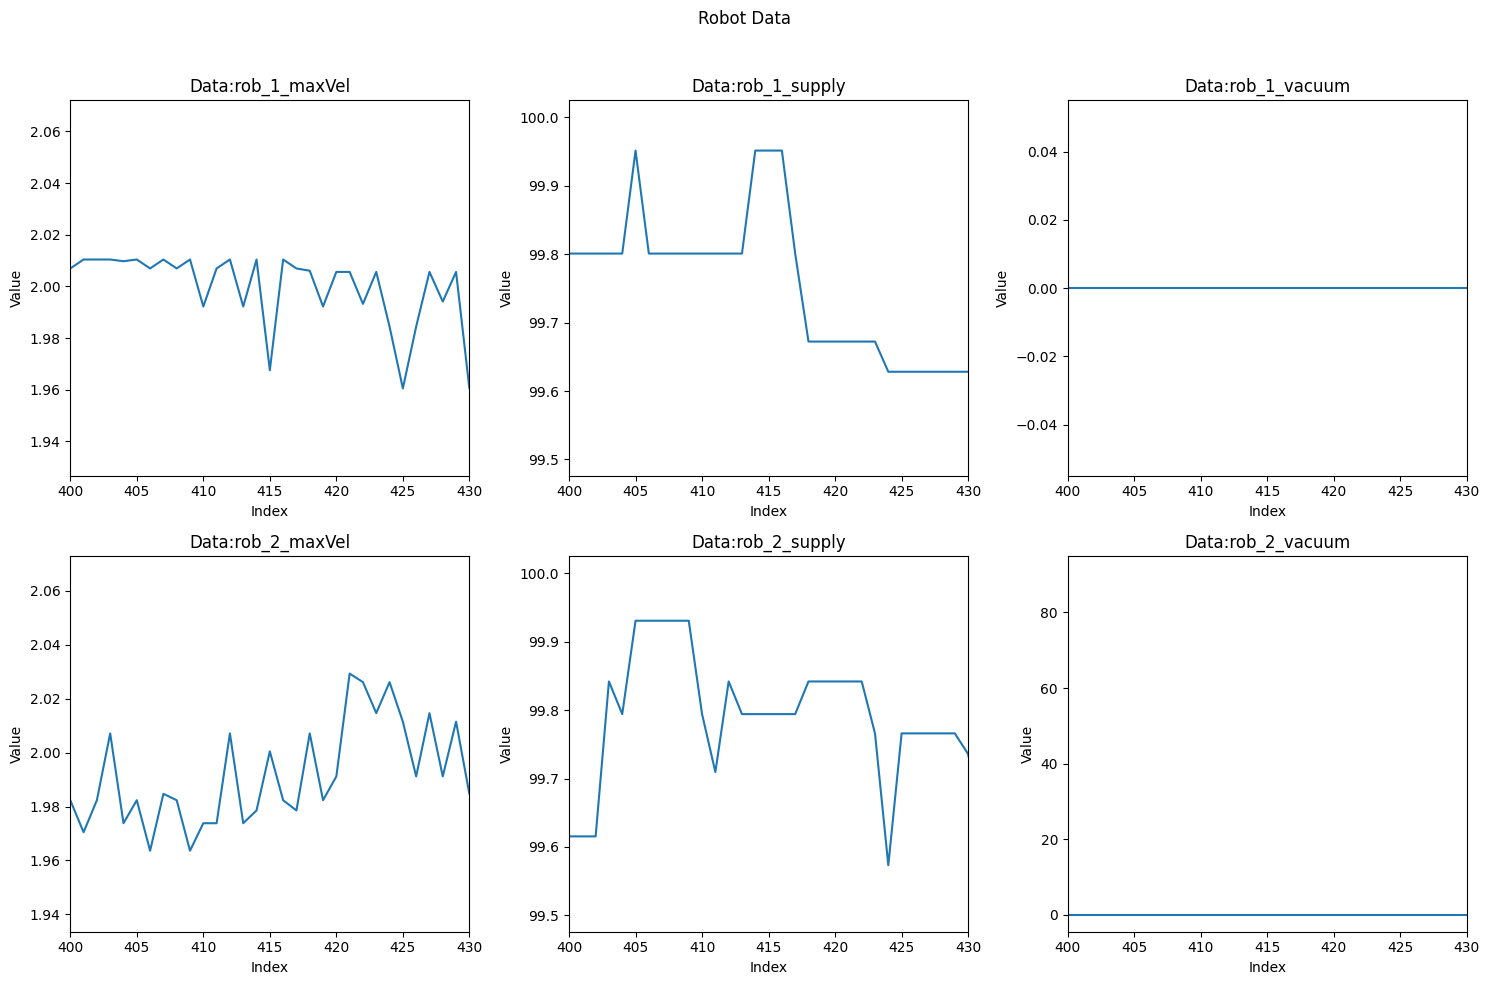

In [87]:
rob_data_df = pd.read_csv(file_selected)

rob_data_df.head()

rob_data_df = rob_data_df[rob_ctrl_nodes]

fig, axes = plt.subplots(2,3, figsize=(15, 10))
fig.suptitle('Robot Data')

for i, ax in enumerate(axes.flatten()):
    column =  rob_data_df.columns[i]
    ax.plot(rob_data_df[column])
    ax.set_title(f'Data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.autoscale()
    ax.set_xlim(400,430)
    

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Cameras

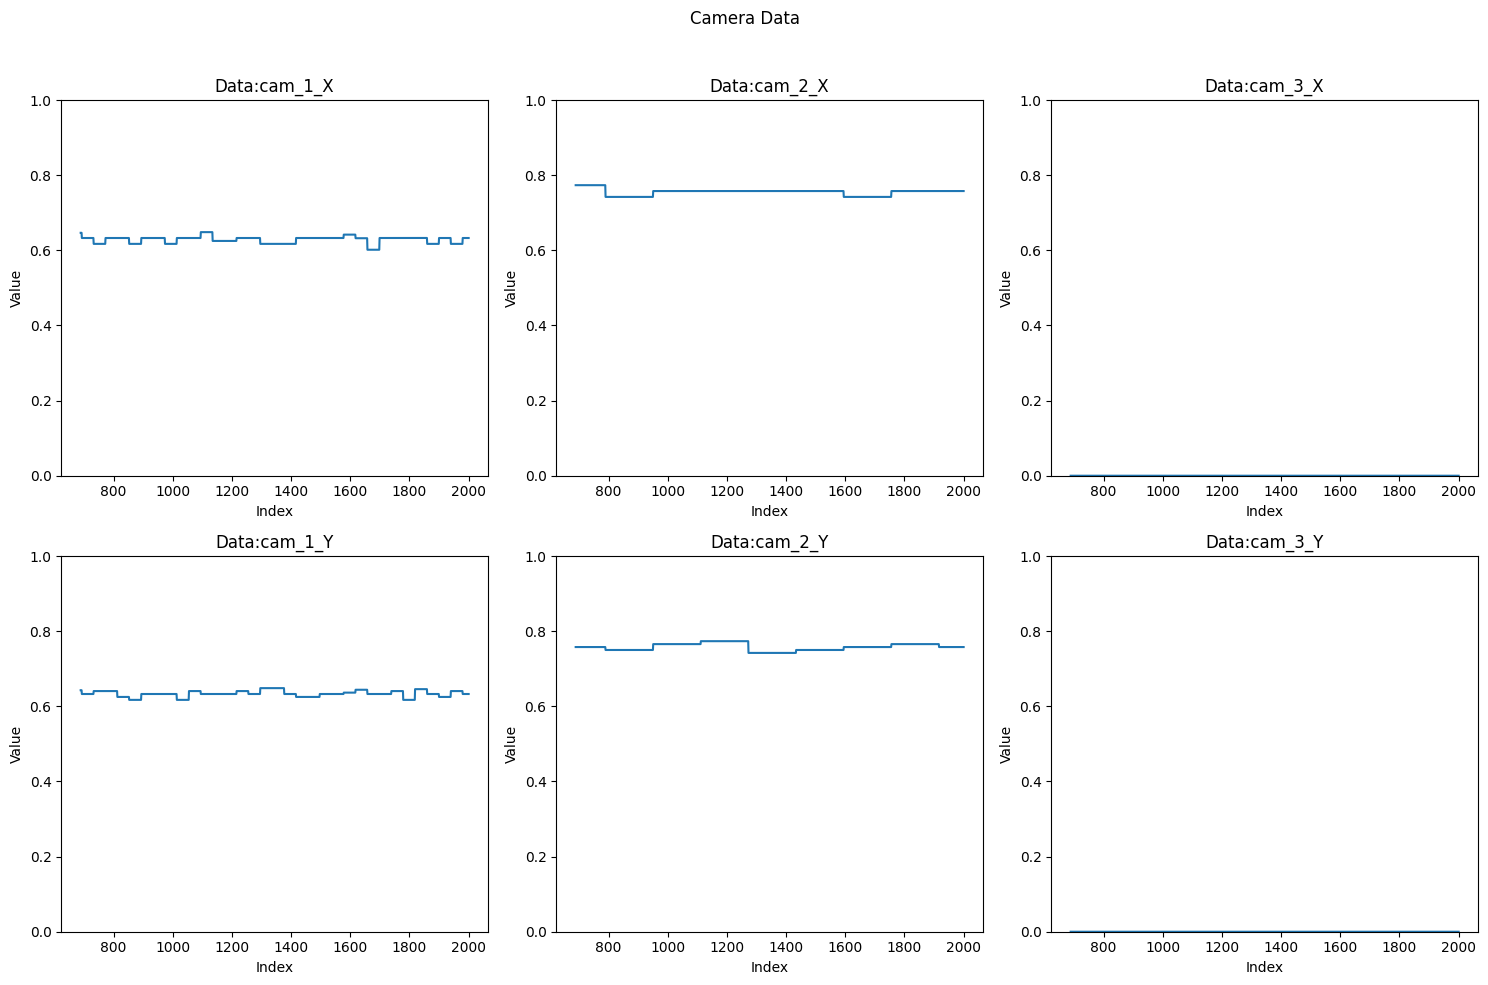

In [88]:
cam_data_df = pd.read_csv(file_selected)

cam_data_df.head()

cam_data_df = cam_data_df[cam_nodes]

fig, axes = plt.subplots(2,3, figsize=(15, 10))
fig.suptitle('Camera Data')

for i, ax in enumerate(axes.flatten()):
    column =  cam_data_df.columns[i]
    ax.plot(cam_data_df[column][689:])
    ax.set_title(f'Data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_ylim([0,1])

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [89]:
from scipy.fftpack import fft, fftfreq, ifft

test = rob_data_df['rob_1_1'].iloc[400:430].values

# Perform FFT
n = len(test)  # Number of data points
speed_fft = fft(test)
speed_fft = sorted(speed_fft,key=abs)
speed_fft = speed_fft[len(speed_fft)-6:len(speed_fft)-1]

freqs = fftfreq(len(speed_fft), 0.05)

# Plotting the results
plt.figure(figsize=(4, 3))
plt.bar(freqs, np.abs(speed_fft))
plt.title('Frequency Components of rob_1_1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()




KeyError: 'rob_1_1'

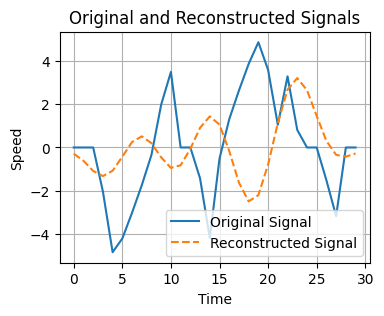

In [ ]:
# Reconstruct the signal using inverse FFT
reconstructed_signal = ifft(speed_fft,30)

# Plotting the original and reconstructed signals
plt.figure(figsize=(4, 3))
plt.plot(test, label='Original Signal')
plt.plot(reconstructed_signal.real, label='Reconstructed Signal', linestyle='--')
plt.title('Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend()
plt.grid()
plt.show()

### Events - Timestamps

In [ ]:
file_event = files[f'{file_input[0:1]}_event']
event_data_df = pd.read_csv(file_event)
event_data_df = event_data_df.reindex(columns=['assembly'] + [col for col in event_data_df.columns if col != 'assembly'])
events_list = []
for index, row in event_data_df.iterrows():
    assembly = row['assembly']
    for action, time in row.items():
        if action != 'assembly' and time > 0:
            event = {"action": action, "time": time, "assembly": assembly}
            events_list.append(event)



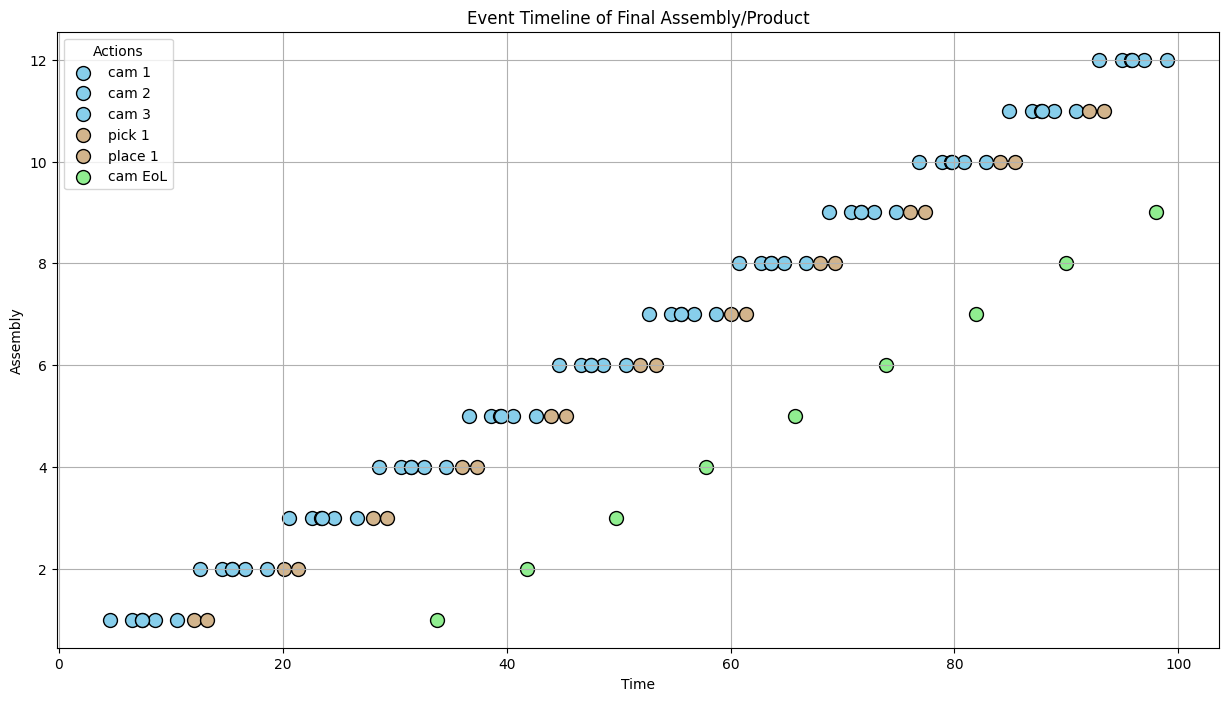

In [ ]:
actions = list(event_data_df.columns[1:])
events_by_action = {action: [] for action in actions}

for event in events_list:
    events_by_action[event["action"]].append(event)

action_colors = {
    "cam 1": "skyblue",
    "cam 2": "skyblue",
    "cam 3": "skyblue",
    "pick 1": "tan",
    "pick 2": "yellow",
    "place 1": "tan",
    "place 2": "yellow",
    "cam EoL": "lightgreen"
}

fig, ax = plt.subplots(figsize=(15, 8))

for action in actions:
    times = [event["time"] for event in events_by_action[action]]
    assemblies = [event["assembly"] for event in events_by_action[action]]
    ax.scatter(times, assemblies, c=action_colors[action], s=100, edgecolor='black', label=action)

ax.set_xlabel('Time')
ax.set_ylabel('Assembly')
ax.set_title('Event Timeline of Final Assembly/Product')
ax.legend(title="Actions")
plt.grid(True)
plt.show()

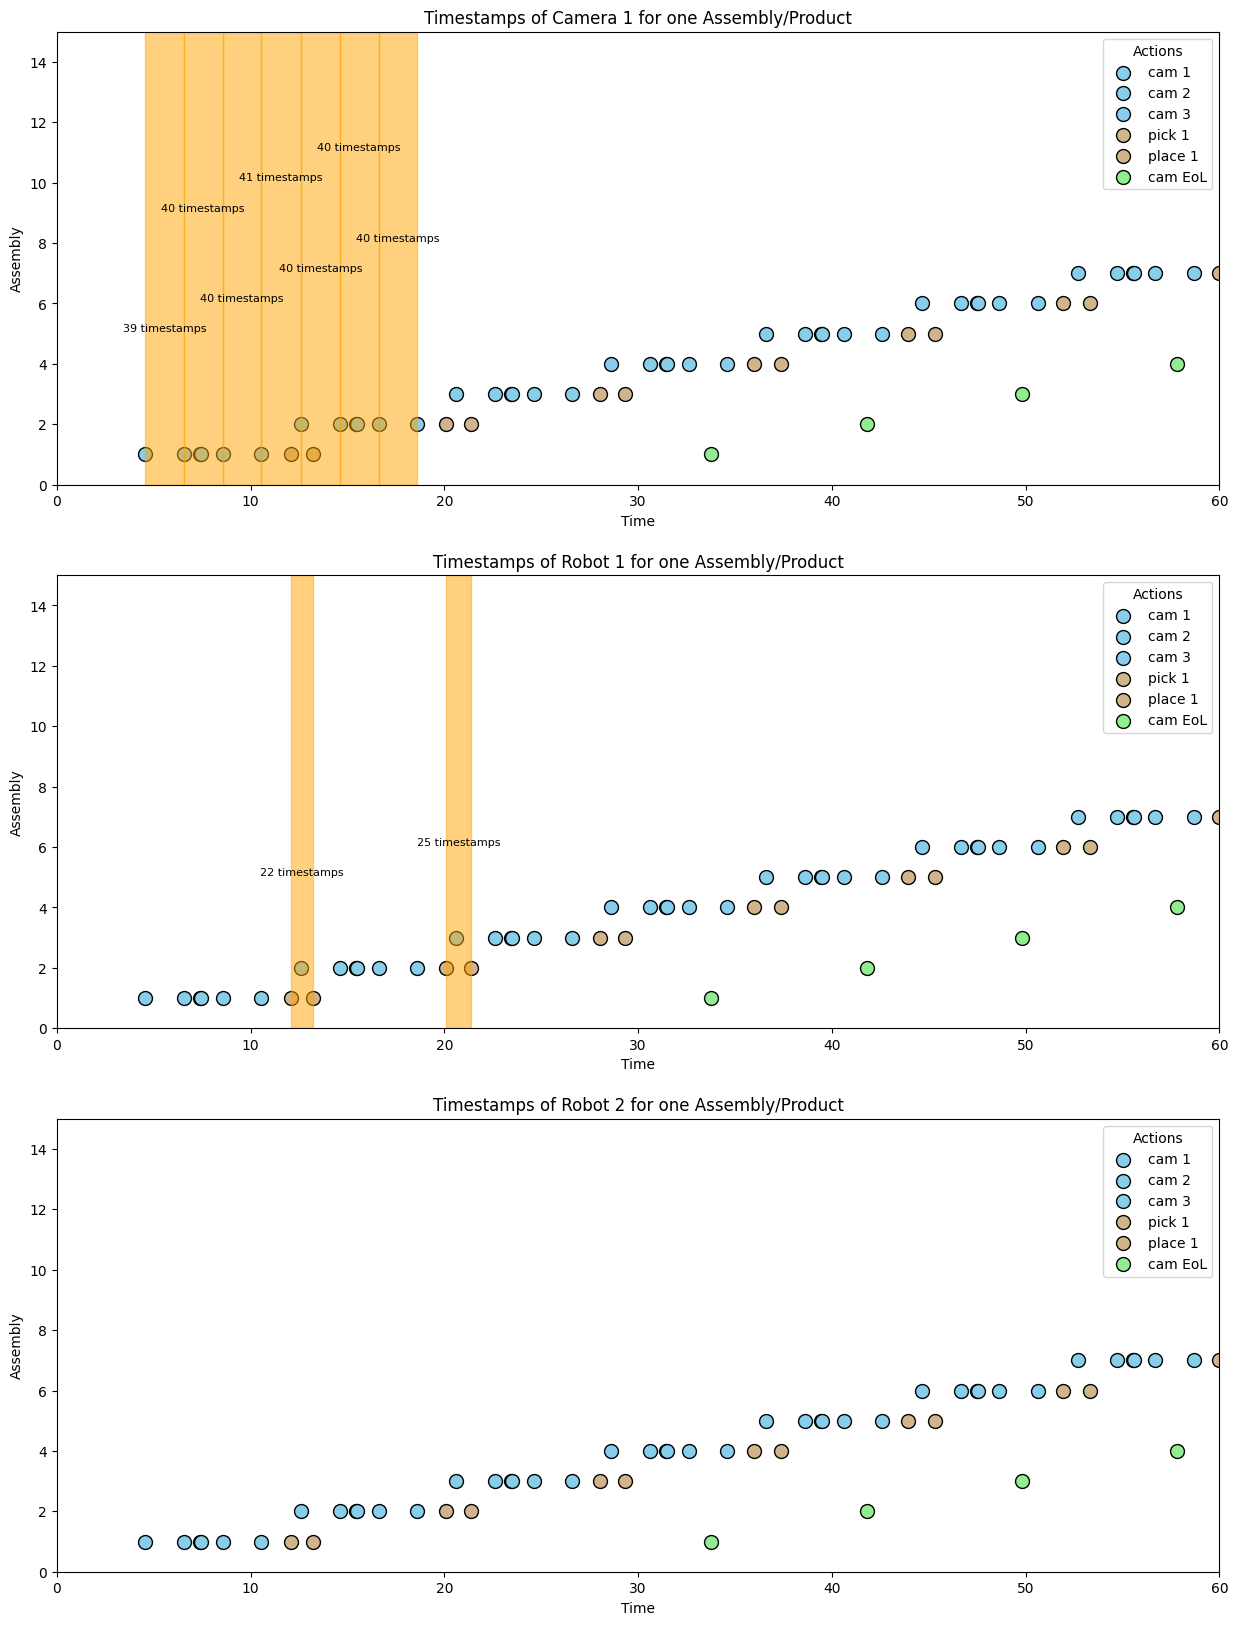

In [ ]:
actions = list(event_data_df.columns[1:])
events_by_action = {action: [] for action in actions}

for event in events_list:
    events_by_action[event["action"]].append(event)

action_colors = {
    "cam 1": "skyblue",
    "cam 2": "skyblue",
    "cam 3": "skyblue",
    "pick 1": "tan",
    "pick 2": "tan",
    "place 1": "tan",
    "place 2": "tan",
    "cam EoL": "lightgreen"
}

fig, axes = plt.subplots(3,1, figsize=(15, 20))

for action in actions:
    times = [event["time"] for event in events_by_action[action]]
    assemblies = [event["assembly"] for event in events_by_action[action]]
    axes[0].scatter(times, assemblies, c=action_colors[action], s=100, edgecolor='black', label=action)

regions = []
regions1 = []
regions2 = []
current_region1_start = None
current_region2_start = None
new_region = False

for event in events_list:
    if 'cam 1' in event["action"] and not new_region and event['assembly'] < 3:
        if current_region1_start is None and current_region2_start is None and event['assembly'] > 0:
            current_region1_start = event["time"]
            new_region = True
        elif current_region1_start is None and current_region2_start is not None and event['assembly'] > 0:
            regions2.append((current_region2_start, event["time"]))
            current_region1_start = event["time"]
            current_region2_start = None
            new_region = True
    elif 'cam 1' in event["action"] and new_region and event['assembly'] < 3:
        if current_region2_start is None and current_region1_start is not None and event['assembly'] > 0:
            regions1.append((current_region1_start, event["time"]))
            current_region1_start = None
            current_region2_start = event["time"]
            new_region = False

regions = regions1 + regions2

counter = 0

for start, end  in regions:
    axes[0].axvspan(start, end, color = 'orange', alpha=0.5)
    counter +=1
    axes[0].text((start + end) / 2.0,4+counter*1,f'{math.floor((end-start)/0.05)} timestamps', ha='center', va='bottom', fontsize=8, color='black')

axes[0].set_xlabel('Time')
axes[0].set_ylabel('Assembly')
axes[0].set_title('Timestamps of Camera 1 for one Assembly/Product')
axes[0].set_xlim(0, 60)
axes[0].set_ylim(0, 15)
axes[0].legend(title="Actions")

for action in actions:
    times = [event["time"] for event in events_by_action[action]]
    assemblies = [event["assembly"] for event in events_by_action[action]]
    axes[1].scatter(times, assemblies, c=action_colors[action], s=100, edgecolor='black', label=action)

regions = []
current_region_start = None
new_region = False

for event in events_list:
    if 'pick 1' in event["action"] and event['assembly'] < 3:
        if current_region_start is None:
            current_region_start = event["time"]
    elif 'place 1' in event["action"] and event['assembly'] < 3:
        if current_region_start is not None and event['assembly']:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

counter = 0

for start, end  in regions:
    axes[1].axvspan(start, end, color = 'orange', alpha=0.5)
    counter +=1
    axes[1].text((start + end) / 2.0,4+counter*1,f'{math.floor((end-start)/0.05)} timestamps', ha='center', va='bottom', fontsize=8, color='black')

axes[1].set_xlabel('Time')
axes[1].set_ylabel('Assembly')
axes[1].set_title('Timestamps of Robot 1 for one Assembly/Product')
axes[1].set_xlim(0, 60)
axes[1].set_ylim(0, 15)
axes[1].legend(title="Actions")

for action in actions:
    times = [event["time"] for event in events_by_action[action]]
    assemblies = [event["assembly"] for event in events_by_action[action]]
    axes[2].scatter(times, assemblies, c=action_colors[action], s=100, edgecolor='black', label=action)

regions = []
current_region_start = None
new_region = False

for event in events_list:
    if 'pick 2' in event["action"] and event['assembly'] < 3:
        if current_region_start is None:
            current_region_start = event["time"]
    elif 'place 2' in event["action"] and event['assembly'] < 3:
        if current_region_start is not None and event['assembly']:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

counter = 0

for start, end  in regions:
    axes[2].axvspan(start, end, color = 'orange', alpha=0.5)
    counter +=1
    axes[2].text((start + end) / 2.0,4+counter*1,f'{math.floor((end-start)/0.05)} timestamps', ha='center', va='bottom', fontsize=8, color='black')

axes[2].set_xlabel('Time')
axes[2].set_ylabel('Assembly')
axes[2].set_title('Timestamps of Robot 2 for one Assembly/Product')
axes[2].set_xlim(0, 60)
axes[2].set_ylim(0, 15)
axes[2].legend(title="Actions")
plt.show()

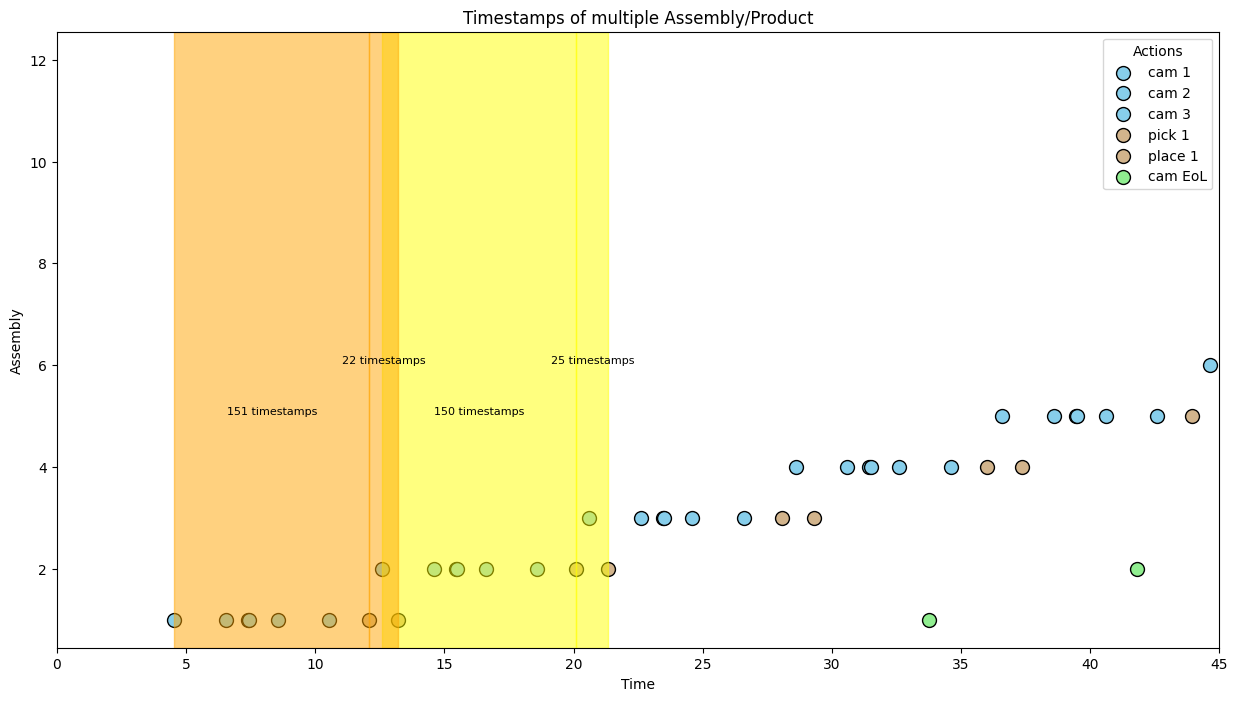

In [ ]:
actions = list(event_data_df.columns[1:])
events_by_action = {action: [] for action in actions}

for event in events_list:
    events_by_action[event["action"]].append(event)

action_colors = {
    "cam 1": "skyblue",
    "cam 2": "skyblue",
    "cam 3": "skyblue",
    "pick 1": "tan",
    "pick 2": "tan",
    "place 1": "tan",
    "place 2": "tan",
    "cam EoL": "lightgreen"
}

fig, ax = plt.subplots(figsize=(15, 8))

for action in actions:
    times = [event["time"] for event in events_by_action[action]]
    assemblies = [event["assembly"] for event in events_by_action[action]]
    ax.scatter(times, assemblies, c=action_colors[action], s=100, edgecolor='black', label=action)

regions = []
current_region_start = None


for event in events_list:
    if ('cam 1' in event["action"] or 'cam 2' in event["action"] or 'cam 3' in event["action"]) and event['assembly'] == 2:
        if current_region_start is None:
            current_region_start = event["time"]
    else:
        if current_region_start is not None and event['assembly'] > 1:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

for event in events_list:
    if ('pick 1' in event["action"] or 'pick 2' in event["action"]) and event['assembly'] ==2:
        if current_region_start is None:
            current_region_start = event["time"]
    elif ('place 1' in event["action"] or 'place 2' in event["action"]) and event['assembly'] ==2:
        if current_region_start is not None and event['assembly'] > 1:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

counter = 0

for start, end  in regions:
    ax.axvspan(start, end, color = 'yellow', alpha=0.5)
    counter +=1
    ax.text((start + end) / 2.0,4+counter*1,f'{math.floor((end-start)/0.05)} timestamps', ha='center', va='bottom', fontsize=8, color='black')

regions = []
current_region_start = None


for event in events_list:
    if ('cam 1' in event["action"] or 'cam 2' in event["action"] or 'cam 3' in event["action"]) and event['assembly'] == 1:
        if current_region_start is None:
            current_region_start = event["time"]
    else:
        if current_region_start is not None and event['assembly'] > 0:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

for event in events_list:
    if ('pick 1' in event["action"] or 'pick 2' in event["action"]) and event['assembly'] ==1:
        if current_region_start is None:
            current_region_start = event["time"]
    elif ('place 1' in event["action"] or 'place 2' in event["action"]) and event['assembly'] ==1:
        if current_region_start is not None and event['assembly'] > 0:
            regions.append((current_region_start, event["time"]))
            current_region_start = None

counter = 0

for start, end  in regions:
    ax.axvspan(start, end, color = 'orange', alpha=0.5)
    counter +=1
    ax.text((start + end) / 2.0,4+counter*1,f'{math.floor((end-start)/0.05)} timestamps', ha='center', va='bottom', fontsize=8, color='black')

ax.set_xlabel('Time')
ax.set_ylabel('Assembly')
ax.set_title('Timestamps of multiple Assembly/Product')
ax.set_xlim(0, 45)
ax.legend(title="Actions")
plt.show()